# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [101]:
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [15]:
df = pd.read_csv('911.csv', dtype={'title': str, 'timeStamp': str, 'addr': str, 'e': str, 'desc': str, 'zip': str }, parse_dates=[5], infer_datetime_format=True, index_col='timeStamp')

** Check the info() of the df **

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99492 entries, 2015-12-10 17:40:00 to 2016-08-24 11:17:02
Data columns (total 8 columns):
lat      99492 non-null float64
lng      99492 non-null float64
desc     99492 non-null object
zip      86637 non-null object
title    99492 non-null object
twp      99449 non-null object
addr     98973 non-null object
e        99492 non-null object
dtypes: float64(2), object(6)
memory usage: 6.8+ MB


** Check the head of df **

In [36]:
df.tail()

,lat,lng,desc,zip,title,twp,addr,e
timeStamp,,,,,,,,
2016-08-24 11:06:00,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401,Traffic: VEHICLE ACCIDENT -,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
2016-08-24 11:07:02,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003,Traffic: VEHICLE ACCIDENT -,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
2016-08-24 11:12:00,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401,EMS: FALL VICTIM,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
2016-08-24 11:17:01,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002,EMS: NAUSEA/VOMITING,HORSHAM,WELSH RD & WEBSTER LN,1
2016-08-24 11:17:02,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446,Traffic: VEHICLE ACCIDENT -,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [28]:
df['zip'].value_counts().head(5)

19401    6979
19464    6643
19403    4854
19446    4748
19406    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [32]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [35]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [53]:
df['title']

timeStamp
2015-12-10 17:40:00            EMS: BACK PAINS/INJURY
2015-12-10 17:40:00           EMS: DIABETIC EMERGENCY
2015-12-10 17:40:00               Fire: GAS-ODOR/LEAK
2015-12-10 17:40:01            EMS: CARDIAC EMERGENCY
2015-12-10 17:40:01                    EMS: DIZZINESS
2015-12-10 17:40:01                  EMS: HEAD INJURY
2015-12-10 17:40:01              EMS: NAUSEA/VOMITING
2015-12-10 17:40:01        EMS: RESPIRATORY EMERGENCY
2015-12-10 17:40:01             EMS: SYNCOPAL EPISODE
2015-12-10 17:40:01       Traffic: VEHICLE ACCIDENT -
2015-12-10 17:40:01       Traffic: VEHICLE ACCIDENT -
2015-12-10 17:40:02       Traffic: VEHICLE ACCIDENT -
2015-12-10 17:40:02       Traffic: VEHICLE ACCIDENT -
2015-12-10 17:40:02       Traffic: VEHICLE ACCIDENT -
2015-12-10 17:40:02       Traffic: VEHICLE ACCIDENT -
2015-12-10 17:40:02       Traffic: VEHICLE ACCIDENT -
2015-12-10 17:46:01        EMS: RESPIRATORY EMERGENCY
2015-12-10 17:47:01                    EMS: DIZZINESS
2015-12-10 17:47:0

In [59]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df['Reason'].head()

timeStamp
2015-12-10 17:40:00     EMS
2015-12-10 17:40:00     EMS
2015-12-10 17:40:00    Fire
2015-12-10 17:40:01     EMS
2015-12-10 17:40:01     EMS
Name: Reason, dtype: object

** What is the most common Reason for a 911 call based off of this new column? **

In [58]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

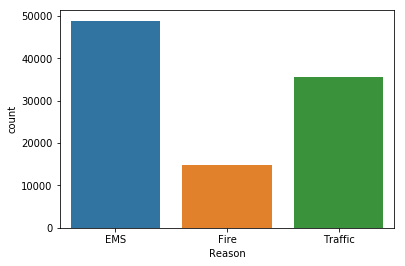

In [61]:
sns.countplot(data=df, x='Reason')

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [66]:
df

,lat,lng,desc,zip,title,twp,addr,e,Reason
timeStamp,,,,,,,,,
2015-12-10 17:40:00,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
2015-12-10 17:40:00,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2015-12-10 17:40:00,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,1,Fire
2015-12-10 17:40:01,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
2015-12-10 17:40:01,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
2015-12-10 17:40:01,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446,EMS: HEAD INJURY,LANSDALE,CANNON AVE & W 9TH ST,1,EMS
2015-12-10 17:40:01,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044,EMS: NAUSEA/VOMITING,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS
2015-12-10 17:40:01,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426,EMS: RESPIRATORY EMERGENCY,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS
2015-12-10 17:40:01,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438,EMS: SYNCOPAL EPISODE,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS


** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [90]:
df['Hour'] = df.index.map(lambda x: x.hour)
df['Month'] = df.index.map(lambda x: x.month)
df['Day of Week'] = df.index.map(lambda x: x.weekday)

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [91]:
df['Day of Week'].value_counts()

1    15150
2    14879
4    14833
0    14680
3    14478
5    13336
6    12136
Name: Day of Week, dtype: int64

In [92]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)
df['Day of Week']

timeStamp
2015-12-10 17:40:00    Thu
2015-12-10 17:40:00    Thu
2015-12-10 17:40:00    Thu
2015-12-10 17:40:01    Thu
2015-12-10 17:40:01    Thu
2015-12-10 17:40:01    Thu
2015-12-10 17:40:01    Thu
2015-12-10 17:40:01    Thu
2015-12-10 17:40:01    Thu
2015-12-10 17:40:01    Thu
2015-12-10 17:40:01    Thu
2015-12-10 17:40:02    Thu
2015-12-10 17:40:02    Thu
2015-12-10 17:40:02    Thu
2015-12-10 17:40:02    Thu
2015-12-10 17:40:02    Thu
2015-12-10 17:46:01    Thu
2015-12-10 17:47:01    Thu
2015-12-10 17:47:01    Thu
2015-12-10 17:47:02    Thu
2015-12-10 17:47:02    Thu
2015-12-10 17:57:02    Thu
2015-12-10 18:02:01    Thu
2015-12-10 18:02:02    Thu
2015-12-10 18:02:02    Thu
2015-12-10 18:06:25    Thu
2015-12-10 18:06:25    Thu
2015-12-10 18:06:25    Thu
2015-12-10 18:06:26    Thu
2015-12-10 18:11:01    Thu
                      ... 
2016-08-24 09:41:00    Wed
2016-08-24 09:42:00    Wed
2016-08-24 09:51:06    Wed
2016-08-24 09:56:13    Wed
2016-08-24 10:01:00    Wed
2016-08-24 10:12:0

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

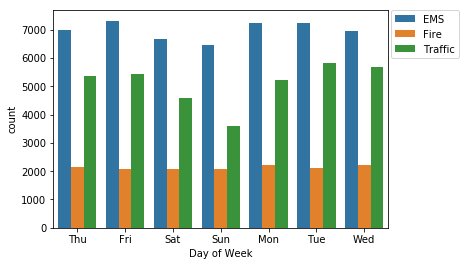

In [113]:
sns.countplot(data=df, x='Day of Week', hue='Reason')
plt.legend(loc=(1.01,0.78))

**Now do the same for Month:**

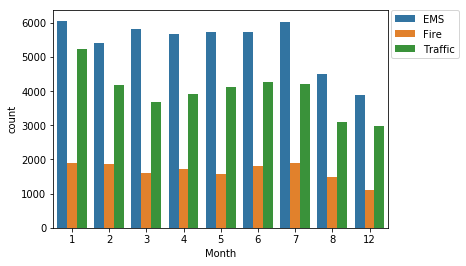

In [115]:
sns.countplot(data=df, x='Month', hue='Reason')
plt.legend(loc=(1.01,0.78))

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [118]:
df_month = df.groupby(by='Month').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

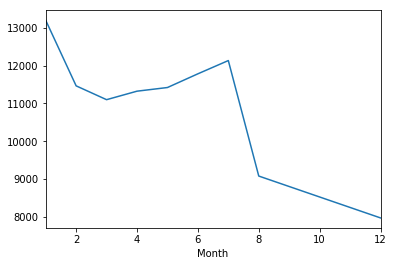

In [125]:
df_month['lat'].plot()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

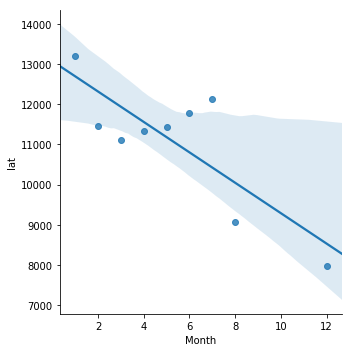

In [128]:
df_month.reset_index(inplace=True)
sns.lmplot(x='Month', y='lat', data=df_month)

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [130]:
df['Date'] = df.index.map(lambda x: x.date)

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

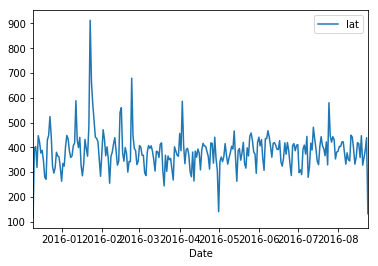

In [142]:
df.groupby(by='Date').count().plot(y='lat')

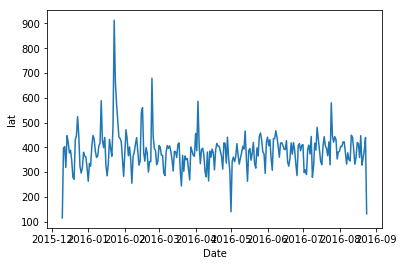

In [147]:
date_gp = df.groupby(by='Date').count()
sns.lineplot(x=date_gp.index, y=date_gp['lat'])

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

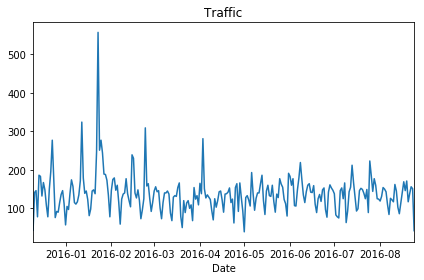

In [176]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

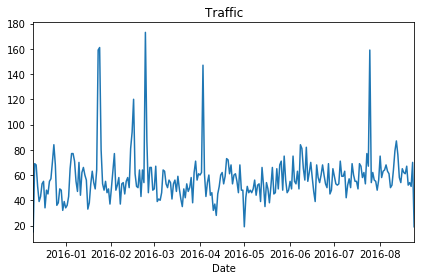

In [177]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

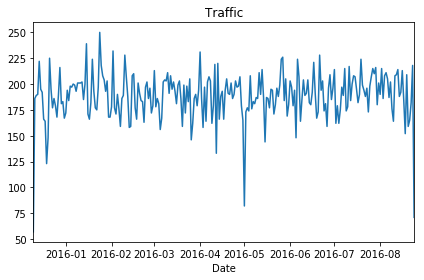

In [178]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [204]:
day_hour= df.groupby(['Day of Week', 'Hour']).count()['Reason'].unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

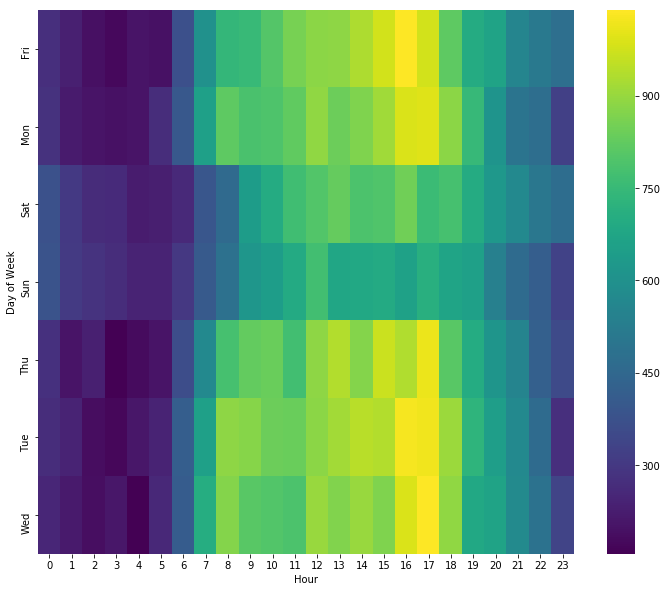

In [212]:
plt.figure(figsize=(12,10))
sns.heatmap(data=day_hour, cmap='viridis')

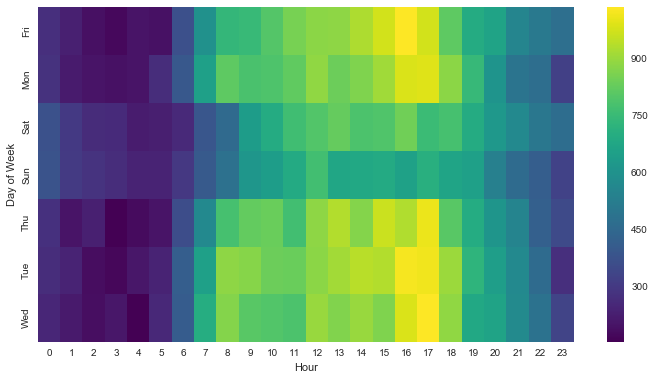

** Now create a clustermap using this DataFrame. **

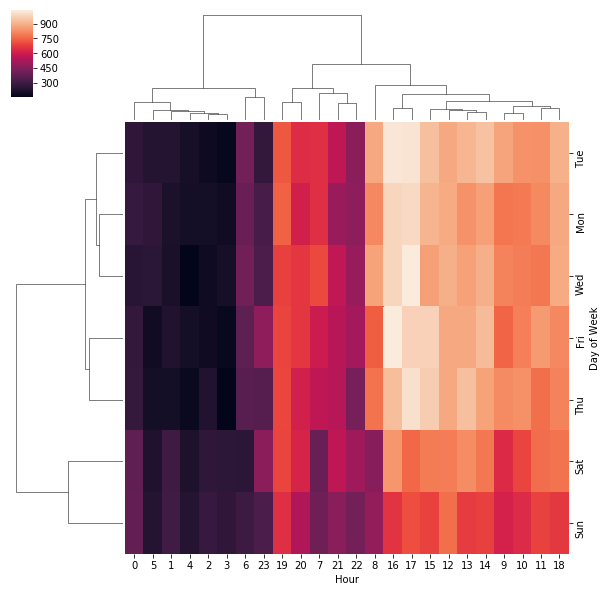

In [213]:
sns.clustermap(data=day_hour)

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [223]:
day_month = df.groupby(by=['Day of Week', 'Month'])['Reason'].count().unstack()
day_month

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


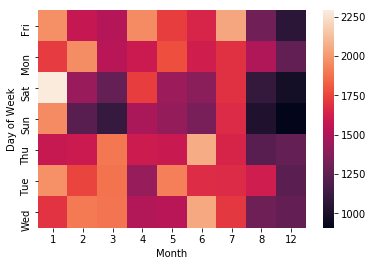

In [222]:
sns.heatmap(data=day_month)

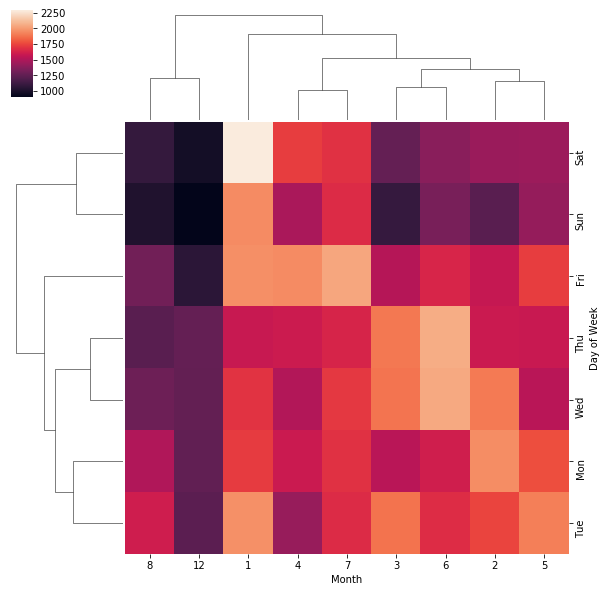

In [224]:
sns.clustermap(data=day_month)

Count of accidents keeps decreasing after month 7. Missing months 9, 10, 11

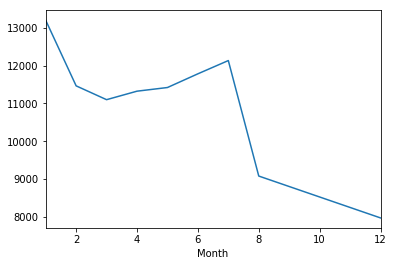

In [227]:
df.groupby('Month').count()['Reason'].plot()

**Continue exploring the Data however you see fit!**
# Great Job!